<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [100]:
# Read CSV
wine_csv = 'winequality_merged.csv'
df = pd.read_csv(wine_csv)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [101]:
df.red_wine.value_counts()

0    4898
1    1599
Name: red_wine, dtype: int64

#### 1.2 Explore Data (Exploratory Data Analysis)

Include pairplot & correlation heatmap table

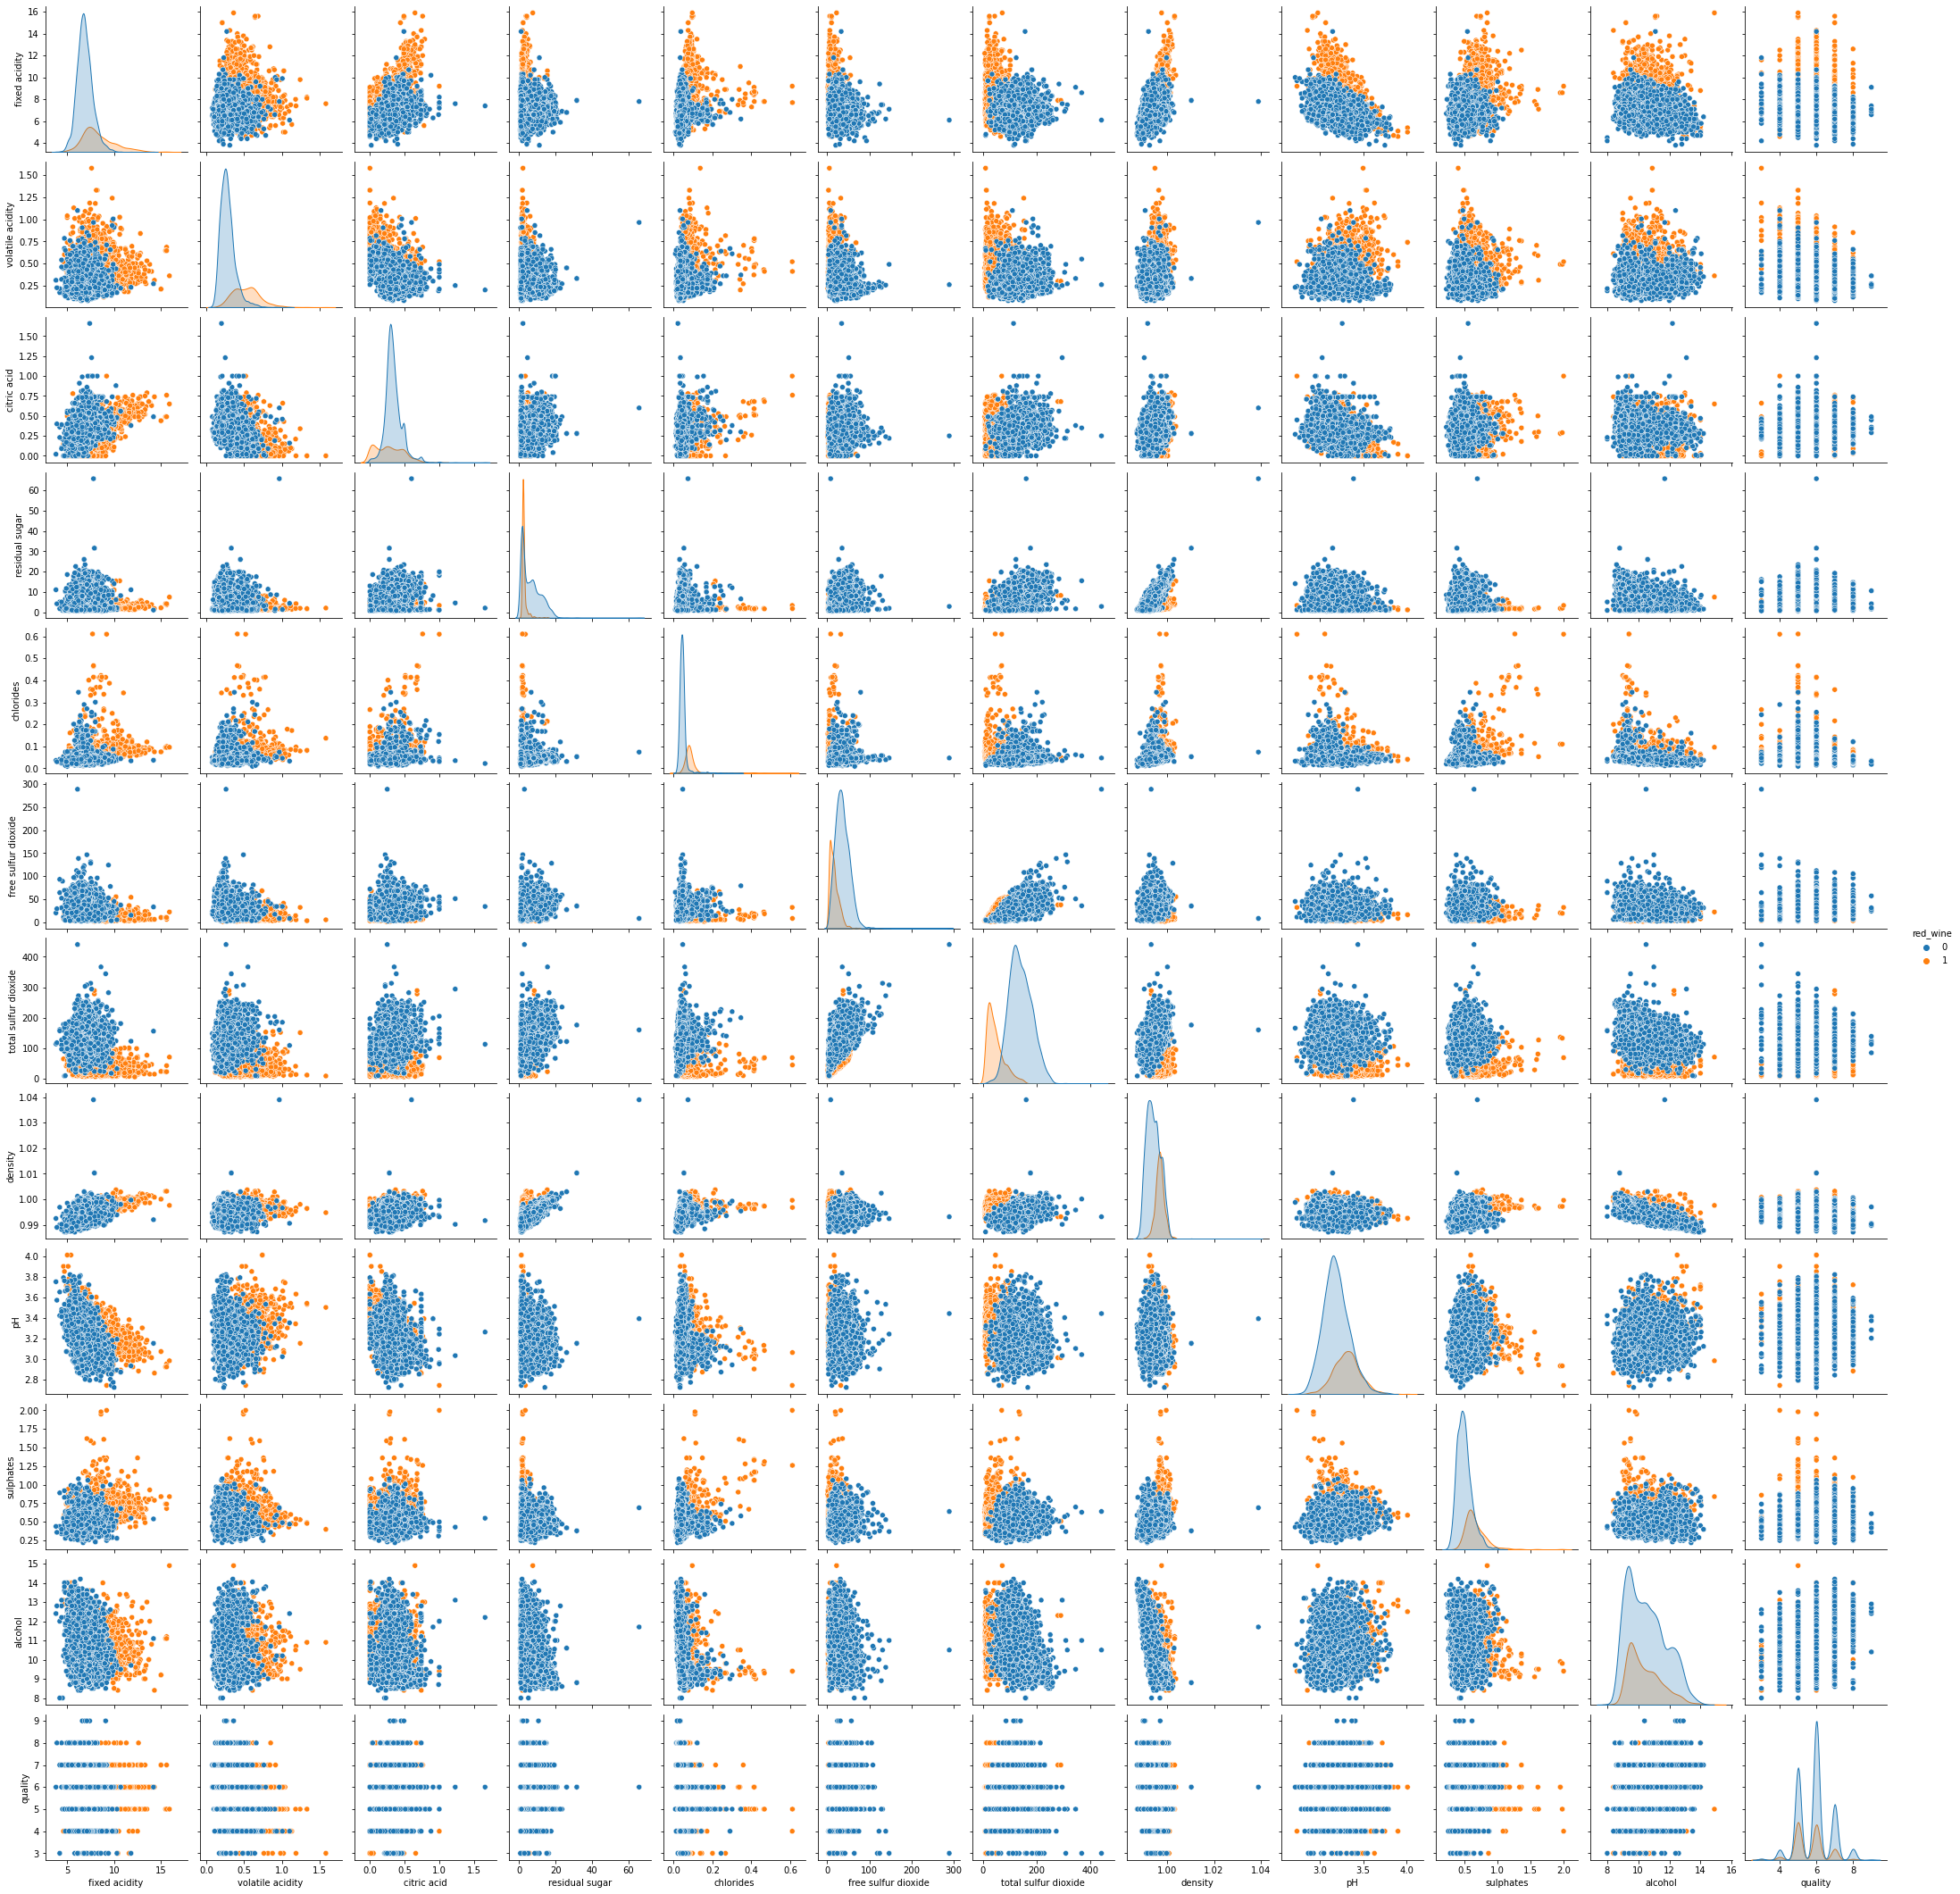

In [102]:
# ANSWER
sns.pairplot(df,hue='red_wine')

<AxesSubplot:>

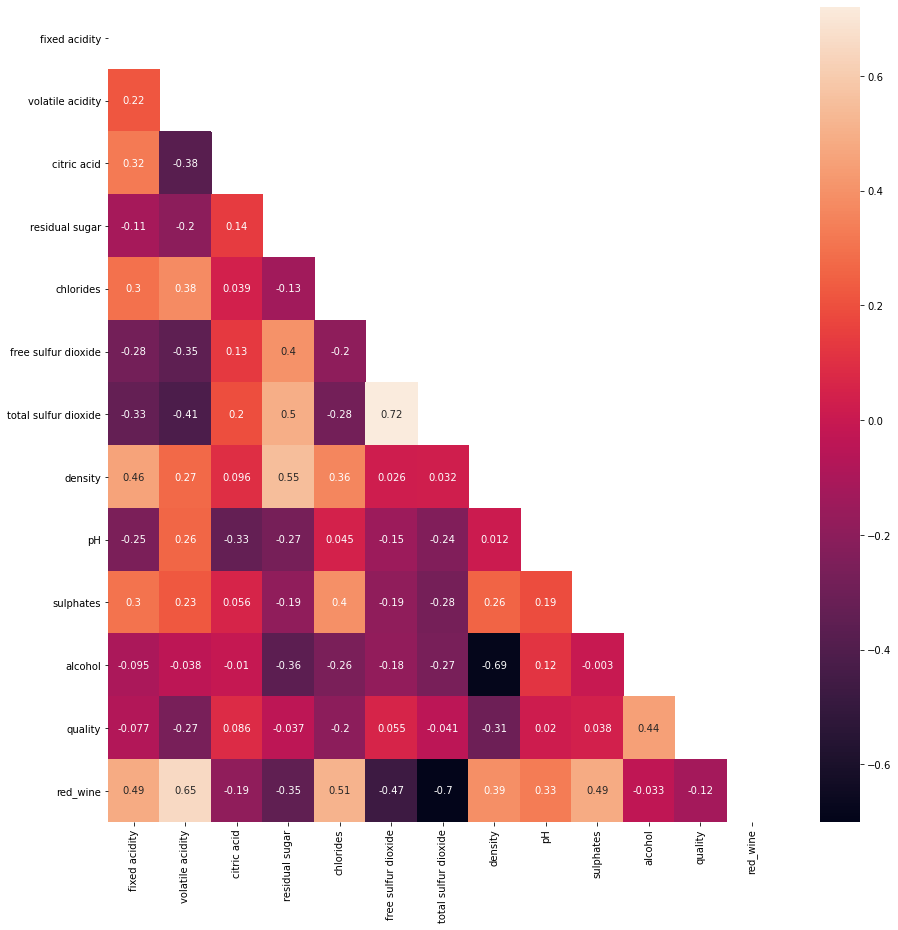

In [21]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,mask=mask)

### 2. Set Target Variable

Create a target variable (y) for wine quality.

In [103]:
# Target Variable

y = df.quality

### 3. Set Predictor Variables

Create a predictor matrix (DataFrame) with variables of your choice. State your reason.

In [104]:
# ANSWER
corr[['quality']]

,quality
fixed acidity,-0.076743
volatile acidity,-0.265699
citric acid,0.085532
residual sugar,-0.036980
chlorides,-0.200666
free sulfur dioxide,0.055463
total sulfur dioxide,-0.041385
density,-0.305858
pH,0.019506
sulphates,0.038485


In [105]:
# check correlations (list in ascending order)
corr['quality_abs'] = np.abs(corr['quality'])
corr.quality_abs.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
red_wine                0.119323
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality_abs, dtype: float64

In [106]:
X = df[['alcohol','density','volatile acidity']]
X

,alcohol,density,volatile acidity
0,9.4,0.99780,0.70
1,9.8,0.99680,0.88
2,9.8,0.99700,0.76
3,9.8,0.99800,0.28
4,9.4,0.99780,0.70
...,...,...,...
6492,11.2,0.99114,0.21
6493,9.6,0.99490,0.32
6494,9.4,0.99254,0.24
6495,12.8,0.98869,0.29


### 4. Using Linear Regression Create a Model and Test Score

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [108]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [109]:
# Create a model for Linear Regression
regr = LinearRegression()
# Fit the model with the Training data
regr.fit(X_train,y_train)
# Calculate the score (R^2 for Regression) for Training Data
print(regr.score(X_train,y_train))
# Calculate the score (R^2 for Regression) for Testing Data
regr.score(X_test,y_test)

0.27078026676393174


0.2519667708304064

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

In [110]:
def fit_regr_model(df,predictor,target='quality'):
    X = df[predictor]
    y = df[target]
    func_regr = LinearRegression()
    func_regr.fit(X,y)
    return func_regr,X,y

In [111]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
red_wine               -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [112]:
alcohol_regr, alcohol_X, alcohol_y = fit_regr_model(df,['alcohol'])
alcohol_regr.score(alcohol_X,alcohol_y)

0.19741894722179099

In [113]:
X12=df[['volatile acidity',
 'free sulfur dioxide',
 'chlorides',
 'red_wine',
 'density',
 'total sulfur dioxide',
 'pH',
 'citric acid',
 'fixed acidity',
 'alcohol',
 'residual sugar',
 'sulphates']]


In [114]:
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y, test_size=0.20, random_state=42)
regr12 = LinearRegression()
regr12.fit(X12_train,y12_train)
regr12.score(X12_train,y12_train),regr12.score(X12_test,y12_test)

(0.3029447101867331, 0.26715748512625626)

### BONUS: Cross validation

In [115]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error as mse

In [123]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []
X_k_fold = df[['alcohol']]
k_fold_regr = LinearRegression()
for k, (train, test) in enumerate(k_fold.split(X_k_fold)):
    k_fold_regr = LinearRegression()
    # Get training and test sets for X and y
    # Fit model with training set
    k_fold_regr.fit(df.iloc[train,[10]],df.iloc[train,11])
    # Make predictions with training and test set
    prediction_train = k_fold_regr.predict(df.iloc[train,[10]])
    prediction_test = k_fold_regr.predict(df.iloc[test,[10]])
    print(prediction_train,prediction_test)
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(k_fold_regr.score(df.iloc[train,[10]],df.iloc[train,11]))
    train_rmse.append(mse(df.iloc[train,11],prediction_train))
    test_scores.append(k_fold_regr.score(df.iloc[test,[10]],df.iloc[test,11]))
    test_rmse.append(mse(df.iloc[test,11],prediction_test))
    
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'training_r2':train_scores,
              'training_rmse':train_rmse,
              'test_r2':test_scores,
              'test_rmse':test_rmse},index=['fold_1','fold_2','fold_3','fold_4','fold_5'])
metrics_df

[5.59244186 5.59244186 5.59244186 ... 5.46359882 6.55876469 6.23665708] [5.46359882 5.46359882 5.46359882 ... 5.52802034 6.62318622 5.52802034]
[5.4656485  5.59601268 5.59601268 ... 6.05228733 5.53083059 6.2478336 ] [5.59601268 5.62860373 5.36787536 ... 5.85674105 5.4656485  6.57374407]
[5.4641943  5.59335906 5.59335906 ... 5.52877668 5.4641943  6.56209478] [5.59335906 5.65794144 5.49648549 ... 6.35220204 6.23918287 6.23918287]
[5.4634653  5.59492822 5.59492822 ... 5.4634653  6.5809001  6.25224281] [5.4634653  5.82498833 5.39773385 ... 6.18651135 5.5127639  5.56206249]
[5.45911501 5.589903   5.589903   ... 5.45911501 6.57081289 6.24384293] [5.589903   5.39372102 5.557206   ... 5.535408   6.63620688 6.04766095]


,training_r2,training_rmse,test_r2,test_rmse
fold_1,0.194158,0.614643,0.210070,0.601224
fold_2,0.198243,0.613346,0.193687,0.606339
fold_3,0.192984,0.615800,0.215138,0.596517
fold_4,0.201867,0.608696,0.179256,0.625048
fold_5,0.199928,0.607100,0.187493,0.631323


In [124]:
# Describe the metrics
metrics_df.describe()

,training_r2,training_rmse,test_r2,test_rmse
count,5.000000,5.000000,5.000000,5.000000
mean,0.197436,0.611917,0.197129,0.612090
std,0.003777,0.003812,0.015132,0.015260
min,0.192984,0.607100,0.179256,0.596517
25%,0.194158,0.608696,0.187493,0.601224
50%,0.198243,0.613346,0.193687,0.606339
75%,0.199928,0.614643,0.210070,0.625048
max,0.201867,0.615800,0.215138,0.631323


**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



